In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 7.8 MB/s eta 0:00:00


In [2]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency, chi2

from sklearn.preprocessing import StandardScaler, scale


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [3]:
# Loading the dataset
df = pd.read_excel('/content/Healthcare_cat_dataset.xlsx')
df.head(2)

,group,ID,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate at,Pulse rate cat,Sys_cat,Diastolic,respiratory cat,temp_cat,SP O2,urine_cat,hemocrit_cat,RBC_Cat,mch_cat,mchc_Cat,mcv_cta,rdw_cat,leukocytes_cat,platelets_cat,neutriphil_cat,Basophil_cat,Lympho_cat,PT_cat(sec),INR_cat,NT_cat,CK_cat,Creatinine_cat,UN_cat,Glu_cat,potas_cat,sodium_cat,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat
0,1,125047,0.0,72,1,0,0,0,0,1,1,0,1,1,0,1,1.0,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1
1,1,139812,0.0,75,2,0,0,0,0,0,1,0,0,0,1,0,1.0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1


In [4]:
# Imputing null values with mode
df['outcome'].fillna(df['outcome'].mode()[0], inplace=True)
df['Pulse rate cat'].fillna(df['Pulse rate cat'].mode()[0], inplace=True)

In [5]:
df['Pulse rate cat'] = df['Pulse rate cat'].astype('int64')
df['outcome'] = df['outcome'].astype('int64')

In [6]:
# Droping unwanted column 'ID'
df.drop(['ID'], axis=1, inplace=True)

## 'anion_bicc' feature
- As 'anion_cat' and 'Biccarbon_cat' both features shows acid-base behaviour.

In [7]:
# New feature
df['anion_bicc'] = df['anion_cat'] + df['Biccarbon_cat']
df.head(2)

,group,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate at,Pulse rate cat,Sys_cat,Diastolic,respiratory cat,temp_cat,SP O2,urine_cat,hemocrit_cat,RBC_Cat,mch_cat,mchc_Cat,mcv_cta,rdw_cat,leukocytes_cat,platelets_cat,neutriphil_cat,Basophil_cat,Lympho_cat,PT_cat(sec),INR_cat,NT_cat,CK_cat,Creatinine_cat,UN_cat,Glu_cat,potas_cat,sodium_cat,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anion_bicc
0,1,0,72,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1
1,1,0,75,2,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1


## 'ren_un' feature
- As 'Renal failure' and 'UN_cat' both features shows problem with kidney function.

In [8]:
# New feature
df['ren_un'] = df['Renal failure'] + df['UN_cat']
df.head(2)

,group,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate at,Pulse rate cat,Sys_cat,Diastolic,respiratory cat,temp_cat,SP O2,urine_cat,hemocrit_cat,RBC_Cat,mch_cat,mchc_Cat,mcv_cta,rdw_cat,leukocytes_cat,platelets_cat,neutriphil_cat,Basophil_cat,Lympho_cat,PT_cat(sec),INR_cat,NT_cat,CK_cat,Creatinine_cat,UN_cat,Glu_cat,potas_cat,sodium_cat,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anion_bicc,ren_un
0,1,0,72,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1
1,1,0,75,2,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,1


## 'leuko_neutri_baso_lympho' feature
- As 'leukocytes_cat', 'neutriphil_cat', 'Basophil_cat', 'Lympho_cat' features shows a type of WBC count.

In [9]:
# New feature
df['leuko_neutri_baso_lympho'] = df['leukocytes_cat'] + df['neutriphil_cat'] + df['Basophil_cat'] + df['Lympho_cat']
df.head(2)

,group,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate at,Pulse rate cat,Sys_cat,Diastolic,respiratory cat,temp_cat,SP O2,urine_cat,hemocrit_cat,RBC_Cat,mch_cat,mchc_Cat,mcv_cta,rdw_cat,leukocytes_cat,platelets_cat,neutriphil_cat,Basophil_cat,Lympho_cat,PT_cat(sec),INR_cat,NT_cat,CK_cat,Creatinine_cat,UN_cat,Glu_cat,potas_cat,sodium_cat,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anion_bicc,ren_un,leuko_neutri_baso_lympho
0,1,0,72,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1,2
1,1,0,75,2,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0


## 'age_bin' feature
- Converting the 'age' columns into bins of 5 years each to 'age_bin'

In [10]:
# Creating bins for age feature and create a new column
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
group_1 = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100']
df['age_bin'] = pd.cut(df['age'], bins, labels = group_1)
df.head(2)

,group,outcome,age,gendera,BMI_cat,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate at,Pulse rate cat,Sys_cat,Diastolic,respiratory cat,temp_cat,SP O2,urine_cat,hemocrit_cat,RBC_Cat,mch_cat,mchc_Cat,mcv_cta,rdw_cat,leukocytes_cat,platelets_cat,neutriphil_cat,Basophil_cat,Lympho_cat,PT_cat(sec),INR_cat,NT_cat,CK_cat,Creatinine_cat,UN_cat,Glu_cat,potas_cat,sodium_cat,cal_cat,chloride_cat,anion_cat,Mag_cat,ph_cat,Biccarbon_cat,metcat,lactic_cat,pco2_cat,ef_cat,anion_bicc,ren_un,leuko_neutri_baso_lympho,age_bin
0,1,0,72,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1,2,70-75
1,1,0,75,2,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,1,0,70-75


In [11]:
X = df.drop(columns=['outcome'], axis=0)
y = df['outcome']

In [ ]:
for col in X.columns:
  Tencoder = TargetEncoder()
  df[col] = Tencoder.fit_transform(df[col], y)
df.head(2)

In [ ]:
df.info()

In [14]:
df.shape

(1177, 56)

In [15]:
def impact(col):
  alpha = 0.05
  # Contingency Table
  contingency_table = pd.crosstab(df[col], df['outcome'])
  # Observed Values
  observed_values = contingency_table.values
  # Expected Values
  exp = chi2_contingency(contingency_table)
  expected_val = exp[3]
  # Degree of freedom
  dof = exp[2]
  # Chi-square statistics - X2
  chi_square = sum([(o-e)**2/e for o, e in zip(observed_values, expected_val)])
  chi_square_statistic = chi_square[0] + chi_square[1]
  # Critical value
  critical_value = chi2.ppf(q=1-alpha, df=dof)
  # p-value
  p_value = 1 - chi2.cdf(x=chi_square_statistic, df=dof)
  
  return round(chi_square_statistic, 5), round(critical_value, 5), round(p_value, 5)

## Handling imballanced data

In [16]:
X = df.drop('outcome', axis = 1)
y = df['outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
X_train.shape

(882, 55)

In [19]:
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

### Before applyting SMOTE

In [20]:
y_train.value_counts()

0    771
1    111
Name: outcome, dtype: int64

### After applying SMOTE

In [21]:
y_sm.value_counts()

0    771
1    771
Name: outcome, dtype: int64

In [22]:
scaler = StandardScaler()

In [23]:
X_sm = scaler.fit_transform(X_sm)
X_test = scaler.transform(X_test)

In [24]:
def model_builder(model_name, model):
    # X_train, X_test, y_train = X_sm, X_test, y_sm
    # model.fit(X_train,y_train)
    train_scores = []
    test_scores = []
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    rocaucscore = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
     # evaluate on the train dataset
    train_yhat = model.predict(X_sm)
    train_acc = accuracy_score(y_sm, train_yhat)
    # train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    # test_scores.append(test_acc)

    result = [model_name , accuracy, f1score, rocaucscore, precision, recall, train_acc, test_acc]
    return result

In [25]:
def multiple_models():
    col_names = ['Model Name', 'Accuracy', 'F1-Score', 'ROC-AUC Score', 'Precision', 'Recall', 'Train Acc', 'Test Acc']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Logistic Regression', LogisticRegression(random_state=42))
    result.loc[len(result)] = model_builder('DTC', DecisionTreeClassifier(random_state=42))
    result.loc[len(result)] = model_builder('SVC', SVC(random_state=42))
    result.loc[len(result)] = model_builder('Random Forest', RandomForestClassifier(random_state=42))
    result.loc[len(result)] = model_builder('KNN', KNeighborsClassifier())
    result.loc[len(result)] = model_builder('Gboost', GradientBoostingClassifier(random_state=42))
    result.loc[len(result)] = model_builder('XGboost', XGBClassifier(random_state=42))
    result.loc[len(result)] = model_builder('AdaBoost', AdaBoostClassifier(random_state=42))
    
    return result.sort_values('Accuracy', ascending = False)

In [26]:
res = multiple_models()
res

,Model Name,Accuracy,F1-Score,ROC-AUC Score,Precision,Recall,Train Acc,Test Acc
3,Random Forest,0.854237,0.376812,0.619222,0.619048,0.270833,1.000000,0.854237
2,SVC,0.847458,0.383562,0.623566,0.560000,0.291667,0.977951,0.847458
5,Gboost,0.827119,0.413793,0.644990,0.461538,0.375000,0.971466,0.827119
6,XGboost,0.823729,0.409091,0.642966,0.450000,0.375000,0.966278,0.823729
0,Logistic Regression,0.816949,0.400000,0.638917,0.428571,0.375000,0.937095,0.816949
7,AdaBoost,0.806780,0.435644,0.666414,0.415094,0.458333,0.922179,0.806780
1,DTC,0.789831,0.415094,0.656292,0.379310,0.458333,1.000000,0.789831
4,KNN,0.735593,0.390625,0.649081,0.312500,0.520833,0.935149,0.735593


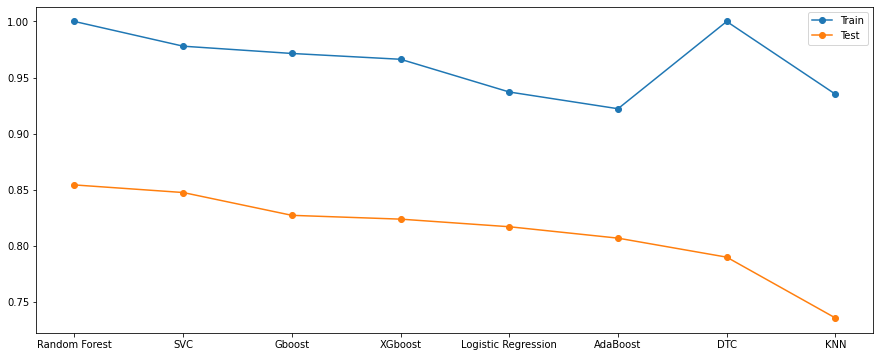

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(res['Model Name'], res['Train Acc'], '-o', label='Train')
plt.plot(res['Model Name'], res['Test Acc'], '-o', label='Test')
plt.legend()
plt.show()

## Now we will create a function as part of cross validation.

In [28]:
def k_fold_cv(X, y, fold = 10):
    score_LR = cross_val_score(LogisticRegression(random_state=42), X, y, cv = fold)
    score_DTC = cross_val_score(DecisionTreeClassifier(random_state=42), X , y , cv = fold)
    score_SVC= cross_val_score(SVC(random_state=42), X , y , cv = fold)
    score_RandomForest = cross_val_score(RandomForestClassifier(random_state=42), X , y , cv = fold)
    score_KNN = cross_val_score(KNeighborsClassifier(), X , y , cv = fold)
    score_GBoost = cross_val_score(GradientBoostingClassifier(random_state=42), X , y , cv = fold)
    score_XGBoost = cross_val_score(XGBClassifier(random_state=42), X , y , cv = fold)
    score_AdaBoost = cross_val_score(AdaBoostClassifier(random_state=42), X , y , cv = fold)
    
    model_name = ['Logistic Regression', 'DTC' , 'SVC' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost']
    scores = [score_LR, score_DTC, score_SVC, score_RandomForest, score_KNN, score_GBoost, score_XGBoost, score_AdaBoost]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV Accuracy' , 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

In [29]:
k_fold_cv(X_sm, y_sm)

,Model Name,CV Accuracy,CV STD
3,Random Forest,0.943121,0.078485
2,SVC,0.930867,0.106947
5,Gboost,0.924336,0.088995
6,XGBoost,0.922388,0.088095
0,Logistic Regression,0.917222,0.100105
4,KNN,0.907922,0.024038
7,AdaBoost,0.900344,0.092024
1,DTC,0.870499,0.087519


In [30]:
def k_fold_cv(X, y, fold = 10):
    score_LR = cross_val_score(LogisticRegression(random_state=42), X, y, cv = fold, scoring = 'f1')
    score_DTC = cross_val_score(DecisionTreeClassifier(random_state=42), X , y , cv = fold, scoring = 'f1')
    score_SVC= cross_val_score(SVC(random_state=42), X , y , cv = fold, scoring = 'f1')
    score_RandomForest = cross_val_score(RandomForestClassifier(random_state=42), X , y , cv = fold, scoring = 'f1')
    score_KNN = cross_val_score(KNeighborsClassifier(), X , y , cv = fold, scoring = 'f1')
    score_GBoost = cross_val_score(GradientBoostingClassifier(random_state=42), X , y , cv = fold, scoring = 'f1')
    score_XGBoost = cross_val_score(XGBClassifier(random_state=42), X , y , cv = fold, scoring = 'f1')
    score_AdaBoost = cross_val_score(AdaBoostClassifier(random_state=42), X , y , cv = fold, scoring = 'f1')
        
    model_name = ['Logistic Regression', 'DTC' , 'SVC' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost']
    scores = [score_LR, score_DTC, score_SVC, score_RandomForest, score_KNN, score_GBoost, score_XGBoost, score_AdaBoost]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV f1-Score' , 'CV STD'])
    return k_fold_df.sort_values('CV f1-Score', ascending = False)

In [31]:
k_fold_cv(X_sm, y_sm)

,Model Name,CV f1-Score,CV STD
3,Random Forest,0.934193,0.101513
4,KNN,0.915286,0.021497
5,Gboost,0.911740,0.123370
2,SVC,0.910142,0.159009
6,XGBoost,0.909661,0.122753
0,Logistic Regression,0.900050,0.148962
7,AdaBoost,0.883516,0.144865
1,DTC,0.862038,0.123855


In [32]:
def k_fold_cv(X, y, fold = 10):
    score_LR = cross_val_score(LogisticRegression(random_state=42), X, y, cv = fold, scoring='roc_auc')
    score_DTC = cross_val_score(DecisionTreeClassifier(random_state=42), X , y , cv = fold, scoring='roc_auc')
    score_SVC= cross_val_score(SVC(random_state=42), X , y , cv = fold, scoring='roc_auc')
    score_RandomForest = cross_val_score(RandomForestClassifier(random_state=42), X , y , cv = fold, scoring='roc_auc')
    score_KNN = cross_val_score(KNeighborsClassifier(), X , y , cv = fold, scoring='roc_auc')
    score_GBoost = cross_val_score(GradientBoostingClassifier(random_state=42), X , y , cv = fold, scoring='roc_auc')
    score_XGBoost = cross_val_score(XGBClassifier(random_state=42), X , y , cv = fold, scoring='roc_auc')
    score_AdaBoost = cross_val_score(AdaBoostClassifier(random_state=42), X , y , cv = fold, scoring='roc_auc')
        
    
    model_name = ['Logistic Regression', 'DTC' , 'SVC' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost']
    scores = [score_LR, score_DTC, score_SVC, score_RandomForest, score_KNN, score_GBoost, score_XGBoost, score_AdaBoost]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV roc_auc' , 'CV STD'])
    return k_fold_df.sort_values('CV roc_auc', ascending = False)

In [33]:
k_fold_cv(X_sm, y_sm)

,Model Name,CV roc_auc,CV STD
3,Random Forest,0.986033,0.026919
2,SVC,0.984128,0.031444
6,XGBoost,0.980889,0.032503
5,Gboost,0.980847,0.034120
4,KNN,0.972345,0.010816
0,Logistic Regression,0.971017,0.051611
7,AdaBoost,0.969082,0.043074
1,DTC,0.870396,0.087900


## Applying Grid_Search_CV on top 3 models

In [34]:
def tuning(X, y , fold = 10):
    #Generally we dont do hyperparameter tuning for all the models, becuase if we train lasso and ridge at max it will give.
    #Parameters Grid for tuning
    param_SVC = {'gamma' : ['scale' , 'auto'], 'C' : [0.5 , 1]}
    param_GB = {"n_estimators":[5,50,250,500], "max_depth":[1,3,5,7,9], "learning_rate":[0.01,0.1,1,10,100]}
    param_RF = {'max_depth' : [3,5,7,8,9,10,12,14,16], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    
    #hyperparameter Tuning
    tune_SVC = GridSearchCV(SVC(random_state=42), param_SVC , cv = fold)
    tune_GB = GridSearchCV(GradientBoostingClassifier(random_state=42) , param_GB , cv = fold)
    tune_RF = GridSearchCV(RandomForestClassifier(random_state=42) , param_RF , cv = fold)
    
    #Fitting X and Y
    tune_SVC.fit(X,y)
    tune_GB.fit(X,y)
    tune_RF.fit(X,y)
    
    tune = [tune_SVC, tune_GB, tune_RF]
    models = ['SVC', 'GBC', 'RFC']
    
    for i in range(len(tune)):
        print('models:', models[i])
        print('best parameters :', tune[i].best_params_) 

In [35]:
tuning(X_sm, y_sm)

models: SVC
best parameters : {'C': 0.5, 'gamma': 'scale'}
models: GBC
best parameters : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250}
models: RFC
best parameters : {'max_depth': 16, 'max_features': 3}


In [38]:
def cv_post_hpt(X,y, fold = 10):
    score_SVC= cross_val_score(SVC(C = 0.5, gamma = 'scale', random_state = 42), X , y , cv = fold)
    score_GBoost = cross_val_score(GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 250, random_state = 42), X , y , cv = fold)
    score_RandomForest = cross_val_score(RandomForestClassifier(max_depth = 16, max_features = 3, random_state = 42), X , y , cv = fold)  
    
    model_name = ['SVC', 'Gboost', 'Random Forest']
    scores = [score_SVC, score_GBoost, score_RandomForest]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV Accuracy' , 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

In [39]:
cv_post_hpt(X_sm,y_sm)

,Model Name,CV Accuracy,CV STD
2,Random Forest,0.948953,0.078266
1,Gboost,0.941169,0.079043
0,SVC,0.934101,0.106904


## Building Learning Curve Analysis

In [40]:
def generate_learning_curve(model_name , estimator , X , y):
    train_size , train_score , test_score = learning_curve(estimator = estimator , X = X , y = y , cv = 10)
    train_score_mean = np.mean(train_score , axis = 1)
    test_score_mean = np.mean(test_score , axis = 1)
    plt.plot(train_size , train_score_mean , c = 'blue')
    plt.plot(train_size , test_score_mean , c = 'red')
    plt.grid()
    plt.xlabel('Samples')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve for ' + model_name)
    plt.legend(('Training Accuracy Score' , 'Testing Accuracy Score'))

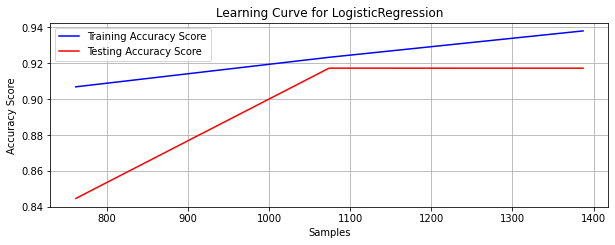

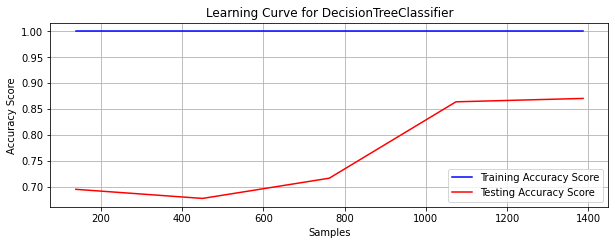

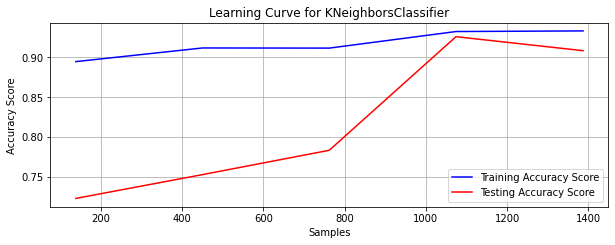

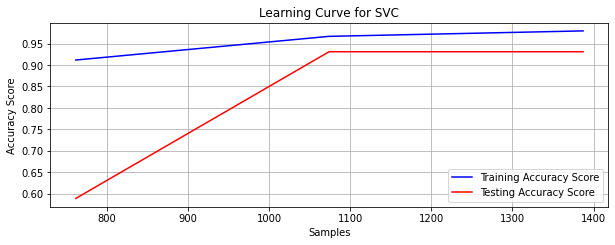

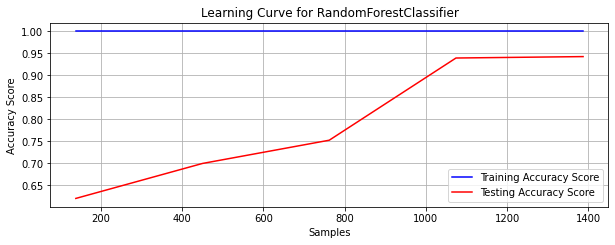

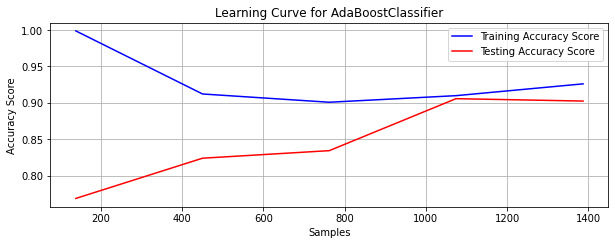

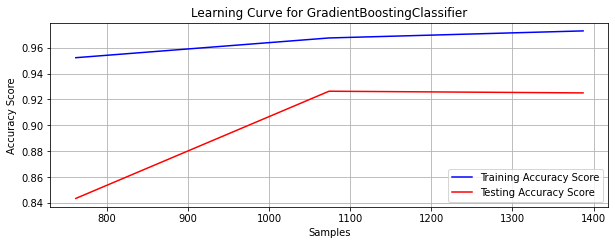

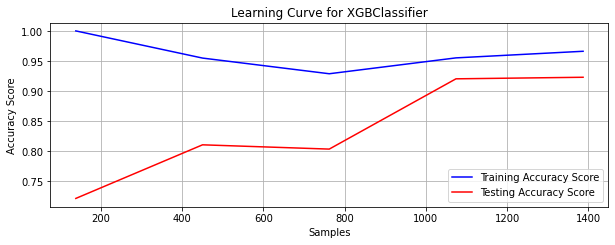

In [41]:
# models = [LogisticRegression(), DecisionTreeClassifier() , KNeighborsClassifier() ,
#             SVC() , RandomForestClassifier() , AdaBoostClassifier() , GradientBoostingClassifier(), 
#               XGBClassifier()]
models = [LogisticRegression(random_state = 42), DecisionTreeClassifier(random_state = 42) , KNeighborsClassifier() ,
            SVC(random_state = 42) , RandomForestClassifier(random_state = 42) , AdaBoostClassifier(random_state = 42) , GradientBoostingClassifier(random_state = 42), 
              XGBClassifier(random_state = 42)]
for a , model in enumerate (models):
    fig = plt.figure(figsize= (10 , 40))
    ax = fig.add_subplot(10 , 1 , a+1)
    generate_learning_curve(type(models[a]).__name__ , model , X_sm , y_sm)

# Precision-Recall curve

In [42]:
def generate_precision_recall_curve(model_name , estimator , X , y):
    train_size , train_score , test_score = learning_curve(estimator = estimator , X = X , y = y , cv = 10)

    estimator.fit(X, y)
    y_score = estimator.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    # fig, ax = plt.subplots()

    plt.plot(recall, precision, color='purple')

    #add axis labels to plot
    plt.title('Precision-Recall Curve for ' + model_name)
    plt.ylabel('Precision')
    plt.xlabel('Recall')

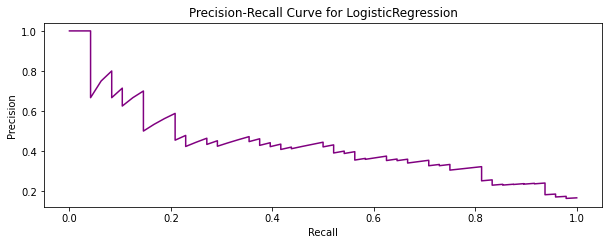

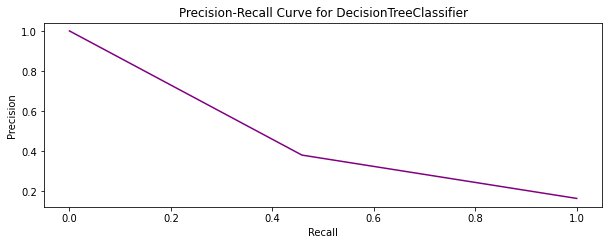

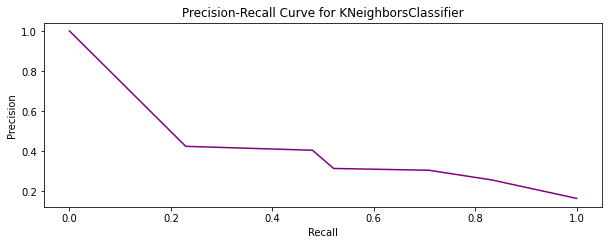

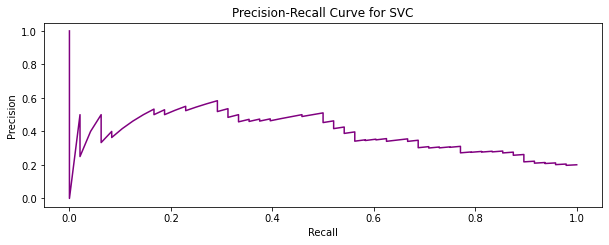

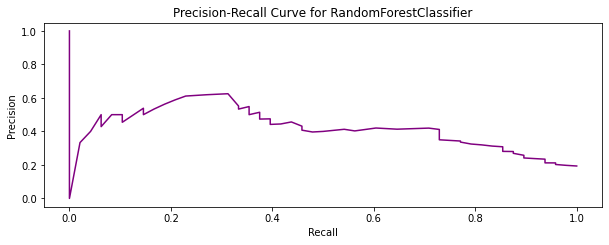

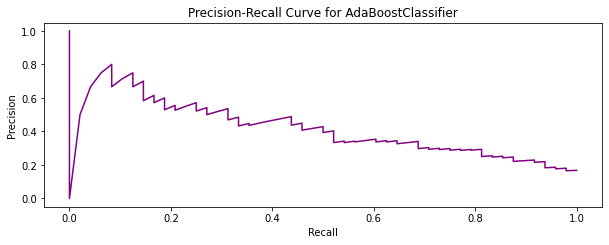

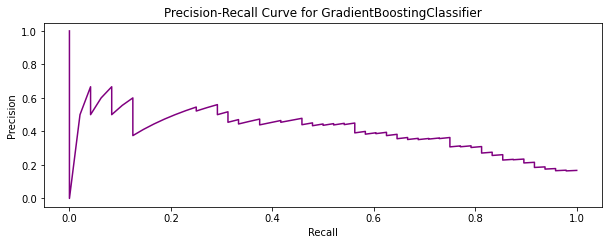

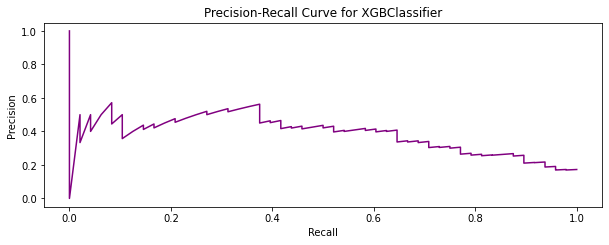

In [43]:
models = [LogisticRegression(random_state = 42), DecisionTreeClassifier(random_state = 42) , KNeighborsClassifier() ,
            SVC(probability=True, random_state = 42) , RandomForestClassifier(random_state = 42) , AdaBoostClassifier(random_state = 42) , GradientBoostingClassifier(random_state = 42), 
              XGBClassifier(random_state = 42)]
for a , model in enumerate (models):
    fig = plt.figure(figsize= (10 , 40))
    ax = fig.add_subplot(10 , 1 , a+1)
    generate_precision_recall_curve(type(models[a]).__name__ , model , X_sm , y_sm)

# Understanding feature importance using Random Forest Classifier

In [44]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(max_depth = 14, max_features = 4, random_state = 42)

# fit the model to the training set
clf.fit(X_sm, y_sm)

RandomForestClassifier(max_depth=14, max_features=4, random_state=42)

In [55]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
value_features = feature_scores.head(15)
value_features

ren_un                      0.060440
leukocytes_cat              0.045026
anion_bicc                  0.044097
anion_cat                   0.040983
cal_cat                     0.040936
rdw_cat                     0.040808
age                         0.039150
age_bin                     0.038277
Lympho_cat                  0.036392
leuko_neutri_baso_lympho    0.028874
chloride_cat                0.028637
Creatinine_cat              0.025725
deficiencyanemias           0.024890
sodium_cat                  0.023671
respiratory cat             0.022231
dtype: float64

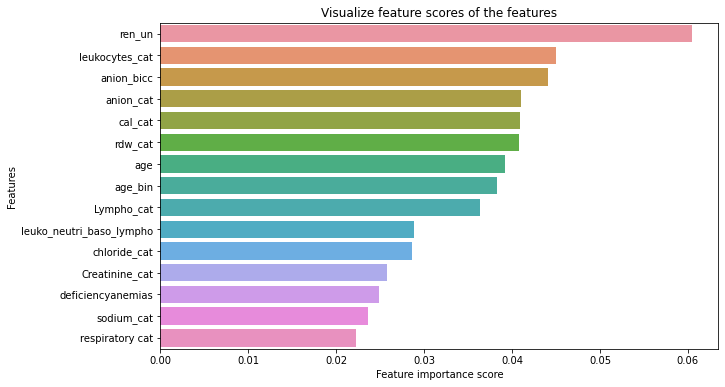

In [58]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=value_features, y=value_features.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(value_features.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()